# **Shuja Bin Amjad** 
[LinkedIn](https://www.linkedin.com/in/shuja-amjad-bb7831286/)  


shujaamjad321@gmail.com


### Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import plotly.express as px

##### Project Description
This dataset is of the sales of Black Friday, in this we will try to find insights about the sales by visualisation after cleaning and preprocessing the data.

# **Explortory Data Analysis**

### Data Cleaning

In [54]:
#Reading the dataset 
df = pd.read_csv("train.csv")

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [56]:
# Size of the dataset 
df.shape

(550068, 12)

In [57]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [58]:
# Description of the Dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [59]:
# Total count of the values in the dataset
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [60]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [61]:
# Checking NaN values in the dataset
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [62]:
# Checking duplicate values in the dataset
df[df.duplicated()].count().sum()

0

In [63]:
# Renaming the dataset
df.rename(columns={'User_ID':'user_id','Product_ID':'product_id','Gender':'gender','Age':'age','Occupation':'occupation',
                   'City_Category':'city_category','Stay_In_Current_City_Years':'city_years','Marital_Status':'marital_status',
                   'Product_Category_1':'category_1','Product_Category_2':'category_2','Product_Category_3':'category_3',
                   'Purchase':'purchase'
                   },inplace=True)

In [64]:
# Removing Reducant Values
df.drop('user_id',axis=1, inplace=True)

#### Checking for the unique values in each individual column of the dataset

In [65]:
df['product_id'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [66]:
df["gender"].unique()

array(['F', 'M'], dtype=object)

In [67]:
df['age'].replace(r'^0-17$', 'child', regex=True, inplace=True)
df['age'].replace(r'^18-25$','teenage',regex=True,inplace=True)
df['age'].replace(r'^26-35$','adult',regex=True,inplace=True)
df['age'].replace(r'^36-45$','adult',regex=True,inplace=True)
df['age'].replace(r'^46-50$','adult',regex=True,inplace=True)
df['age'].replace(r'^51-55$','old',regex=True,inplace=True)
df['age'].replace(r'^55\+$','old',regex=True,inplace=True)
df.head(5)

,product_id,gender,age,occupation,city_category,city_years,marital_status,category_1,category_2,category_3,purchase
0,P00069042,F,child,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,child,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,child,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,child,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,old,16,C,4+,0,8,NaN,NaN,7969


In [68]:
df["age"].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [69]:
df["occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [70]:
# Checking for the unique values for city_category column
df["city_category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [71]:
# Checking for the unique values for in user_id column
df["marital_status"].unique()

array([0, 1], dtype=int64)

In [72]:
# Checking for the unique values for in product_id column
df["product_id"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [73]:
# Checking for unique values for category_1 column
df["category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [74]:
# Checking for unique values for category_2 column
df["category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [75]:
df["category_2"].fillna(0, inplace=True)
df["category_2"].unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [76]:
df['category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [77]:
df['category_3'].fillna(0, inplace=True)
df['category_3'].unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [78]:
df['purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [79]:
df.isna().sum()

product_id        0
gender            0
age               0
occupation        0
city_category     0
city_years        0
marital_status    0
category_1        0
category_2        0
category_3        0
purchase          0
dtype: int64

In [80]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

# **Data Visualization**

<AxesSubplot: xlabel='purchase', ylabel='Count'>

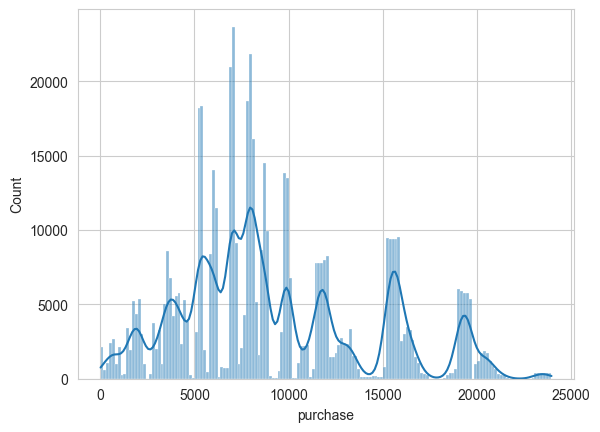

In [81]:
sns.histplot(data = df['purchase'], kde= True)

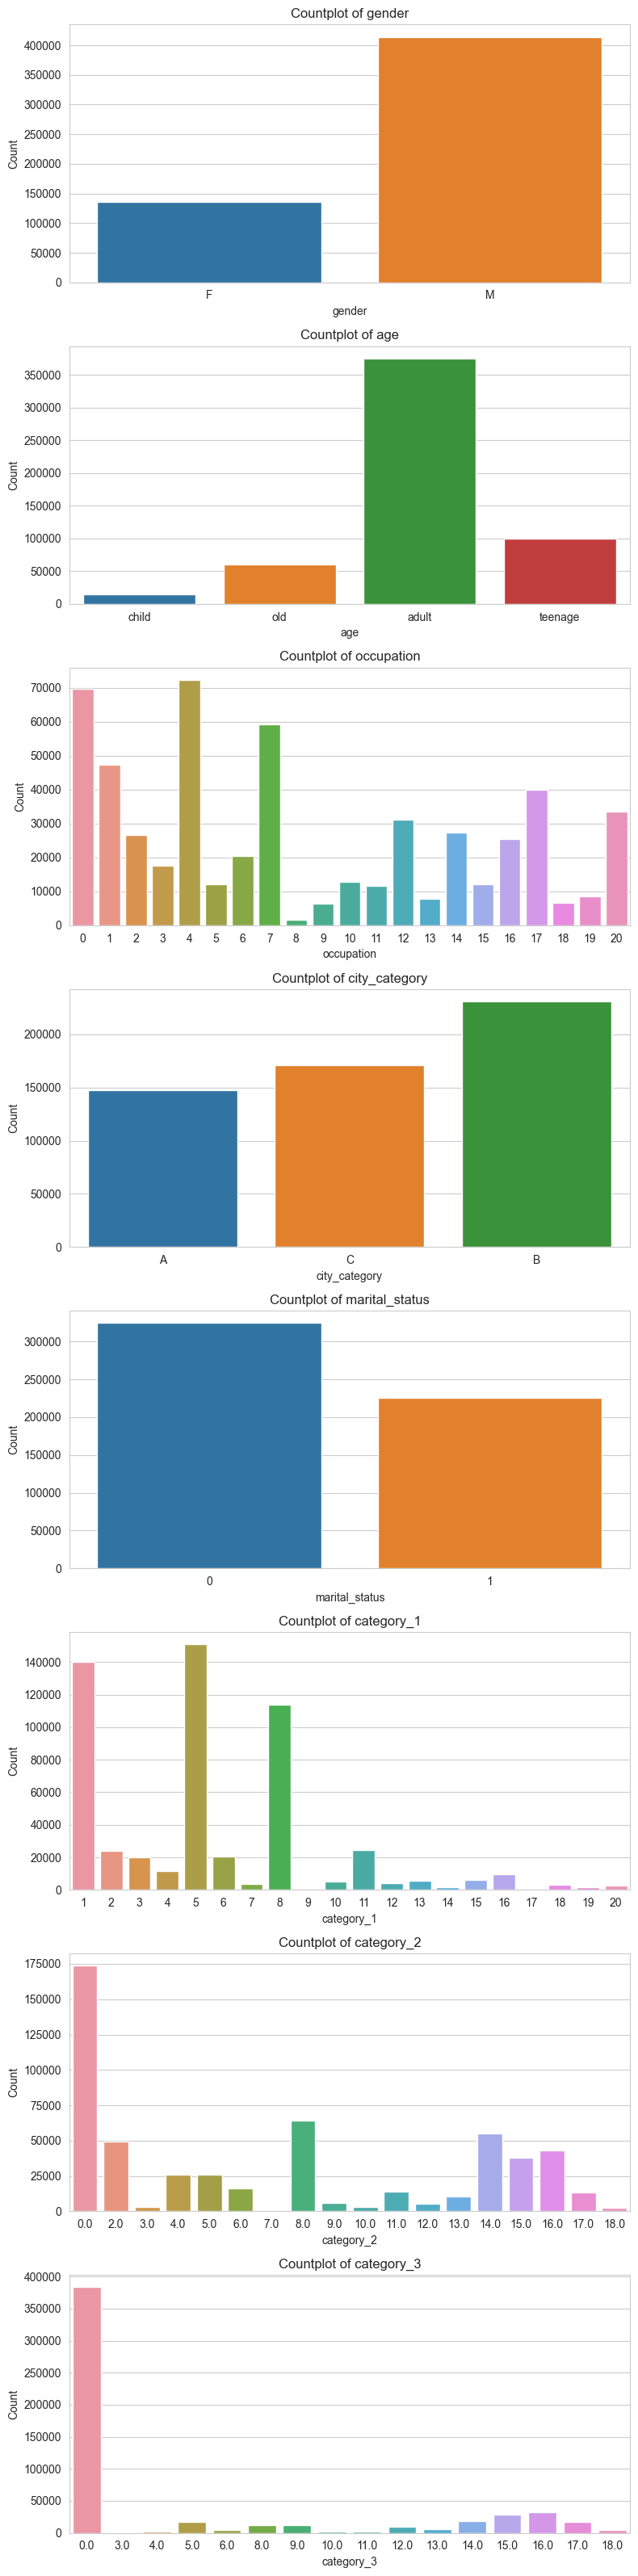

In [82]:
# List of columns for which to create countplots

list1= ['gender','age','occupation','city_category','marital_status','category_1','category_2','category_3']
# Set up the subplot layout
num_plots = len(list1)
num_rows = num_plots  # Each plot on a separate row

# Create subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_plots))

# Loop through each column and create a countplot
for i, column in enumerate(list1):
    ax = axes[i]
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f'Countplot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
# Show the plots
plt.show()

## Insights from these visualistaion

#### Gender: From the above visualization we observe that the ratio of Males is more as compared to Females

#### Age: From the above visualization we observe that the ratio of adult cateogry is more as compared to child,teenager and old category

#### Occupation: Most customers having occupation 4,0 and 7

#### City_Category : Majority of the cusomters are from category B

#### Marital Status : Considering 0 as yes and 1 as no, most of the customers are married

#### Category_1 : Most of the products are purchased from 1,5,8

#### Category_2 : Most of the products are purchased from 0 and 8
#### Category_3 : Most of the products are purchased from 0 and 8

In [83]:
df["age"].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

,age,purchase
0,adult,9270.382613
1,child,8933.464640
2,old,9463.661678
3,teenage,9169.663606


<AxesSubplot: xlabel='age', ylabel='purchase'>

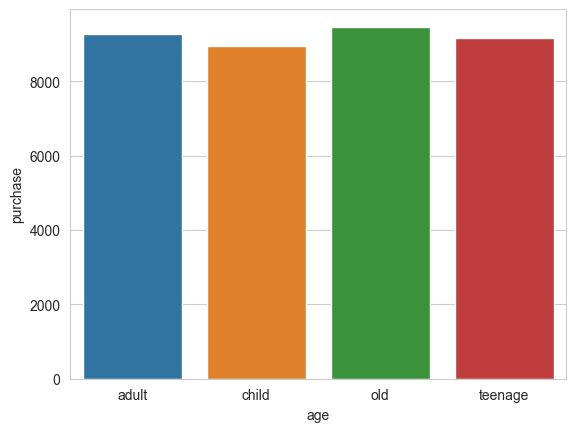

In [84]:
comparison = df.groupby('age').agg({'purchase':'mean'}).reset_index()
display(comparison)
sns.barplot(data = comparison, x = 'age',y = 'purchase')

#### Here we understood that the putchase rate of old age people is highest and the lowest is of child

In [85]:
f = px.bar(comparison, x = "purchase", y = "age")
f.show()

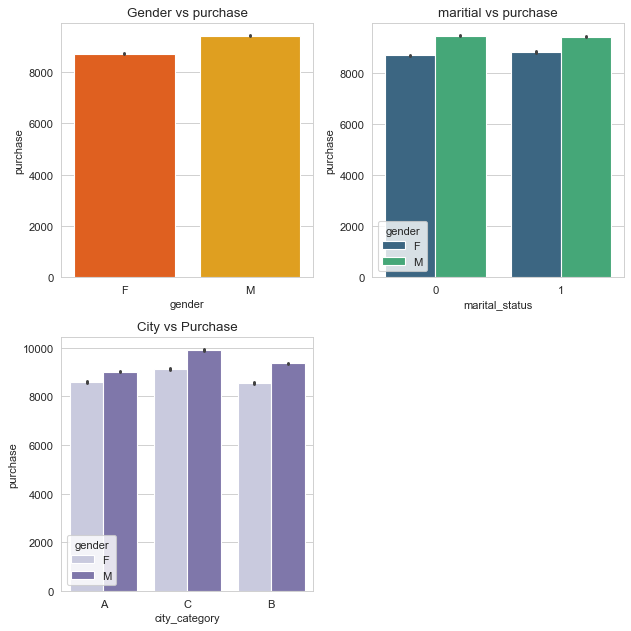

In [86]:
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(2,2,1)
plt.title('Gender vs purchase')
sns.barplot(x='gender',y='purchase',data=df,palette='autumn')

plt.subplot(2,2,2)
plt.title('maritial vs purchase')
sns.barplot(x='marital_status',y='purchase',hue='gender',data=df,palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=df,x='city_category',y='purchase',hue='gender',palette='Purples')

plt.tight_layout()
plt.show()

#### 1. From the above visualization we observe that for gender vs purchase, the ratio for purchase by males is more as compared to females
#### 2. For maritial status vs purchase we observe that married males ratio is more as compared to married females
#### 3. For city vs purchase we observe that for city C the purchase is more as compared to city A and city B

In [87]:
# Occupation VS Purchased
comparisons = df.groupby(['age','gender','marital_status','occupation']).agg({'purchase': 'mean'}).reset_index()

<AxesSubplot: xlabel='occupation', ylabel='purchase'>

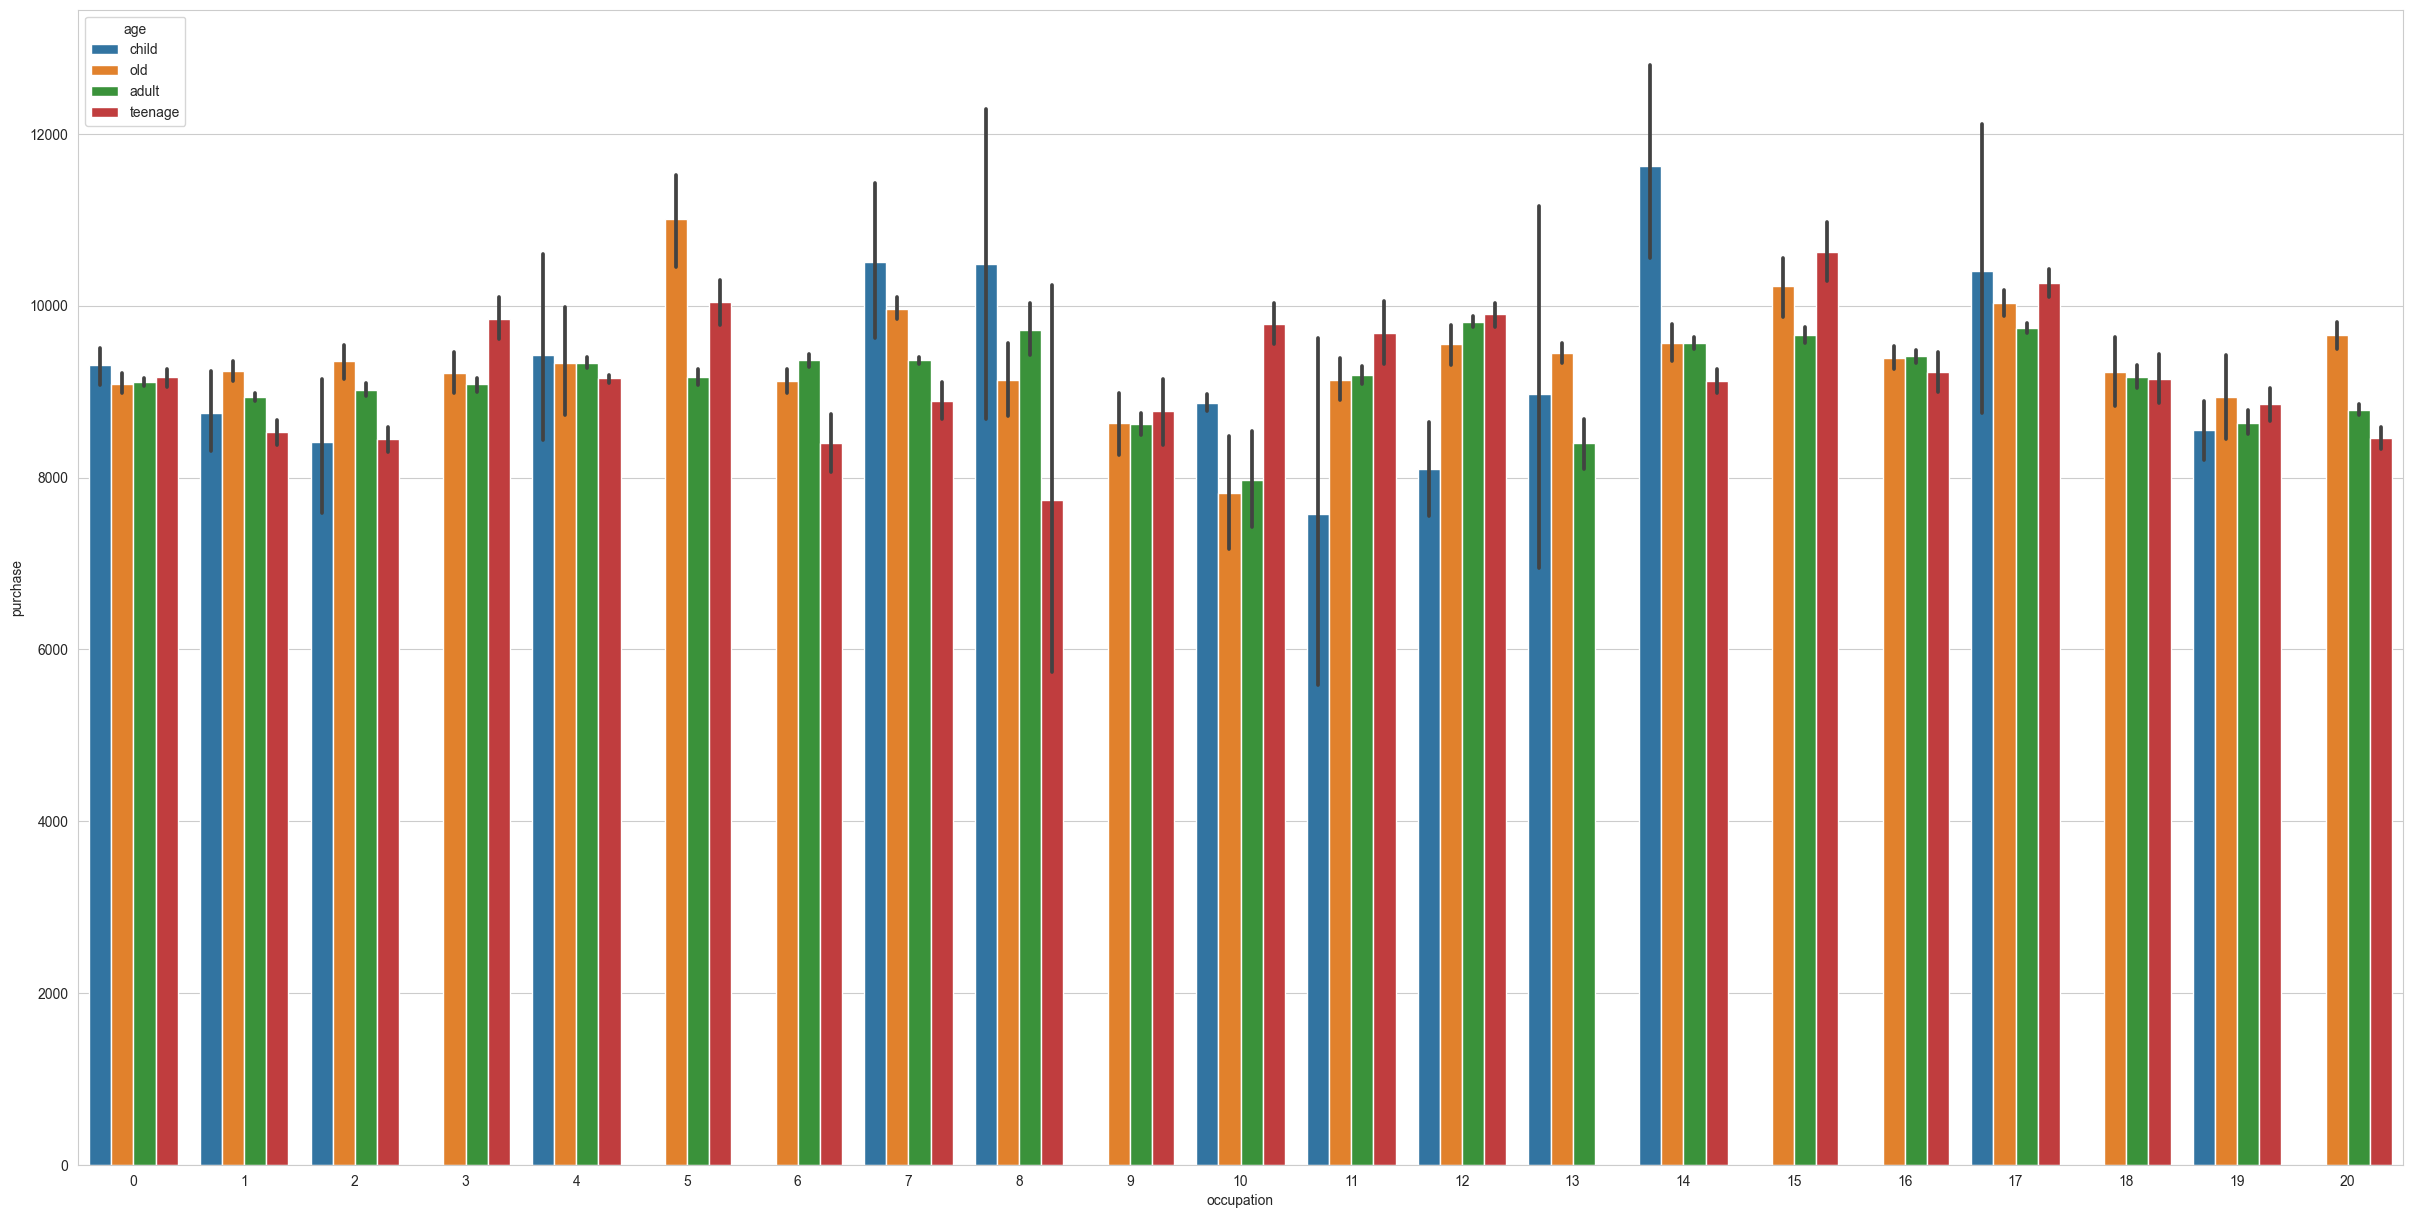

In [88]:
plt.figure(figsize=(30,15))
sns.set_style("whitegrid")
sns.barplot(data=df,y='purchase',x='occupation',hue='age')

<AxesSubplot: xlabel='occupation', ylabel='purchase'>

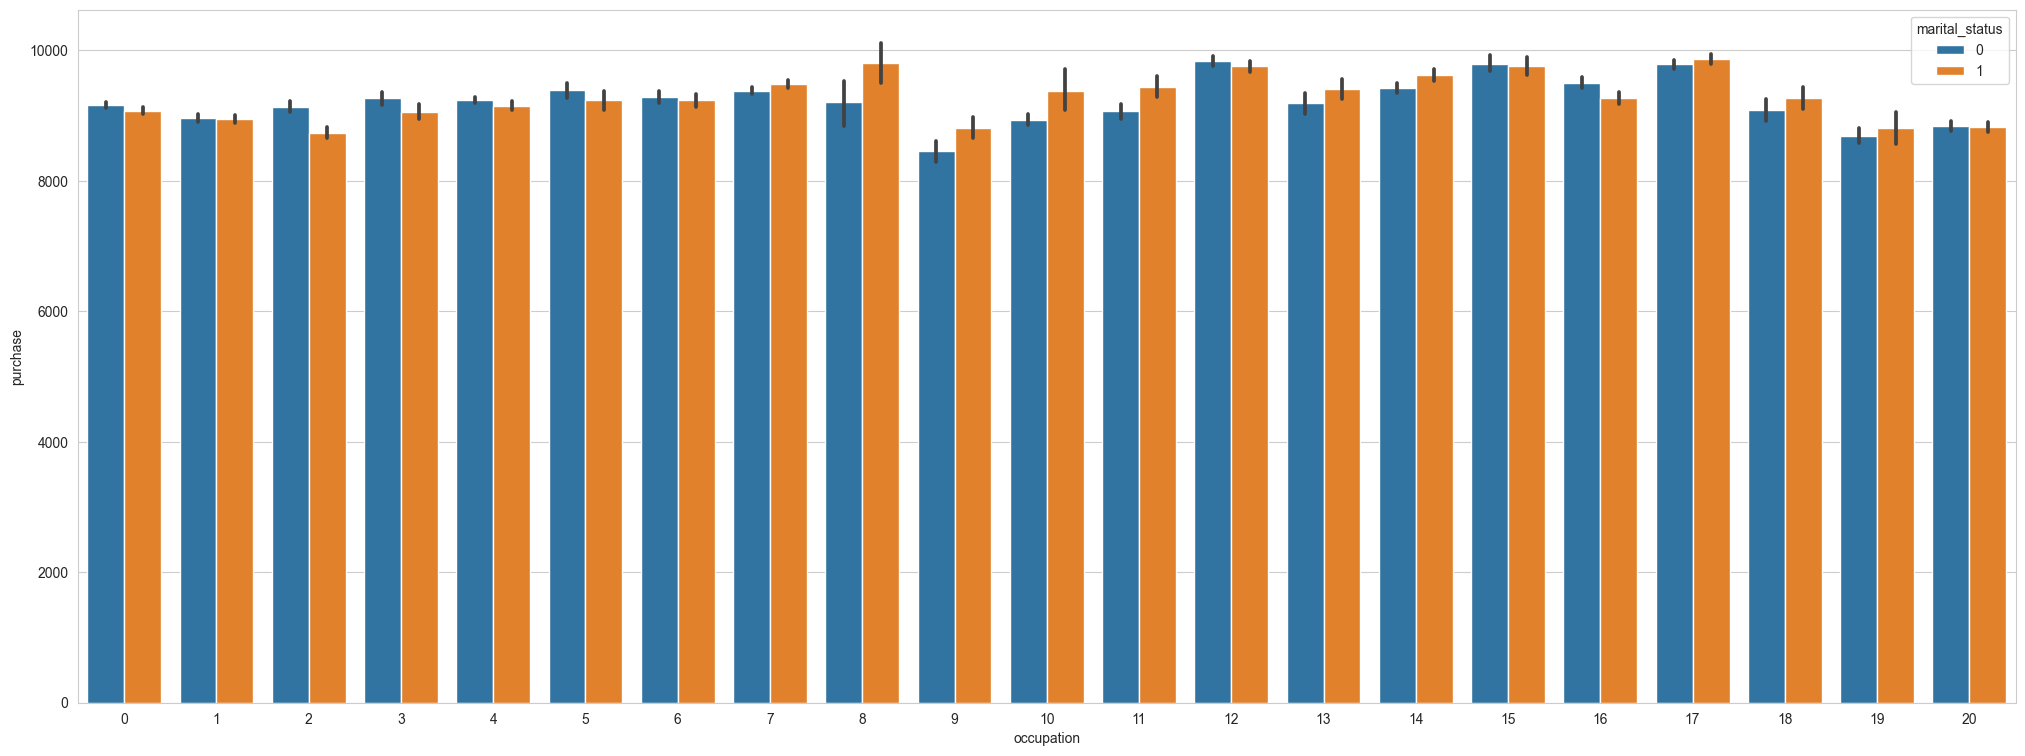

In [89]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.barplot(data=df,y='purchase',x='occupation',hue='marital_status')

<AxesSubplot: xlabel='occupation', ylabel='purchase'>

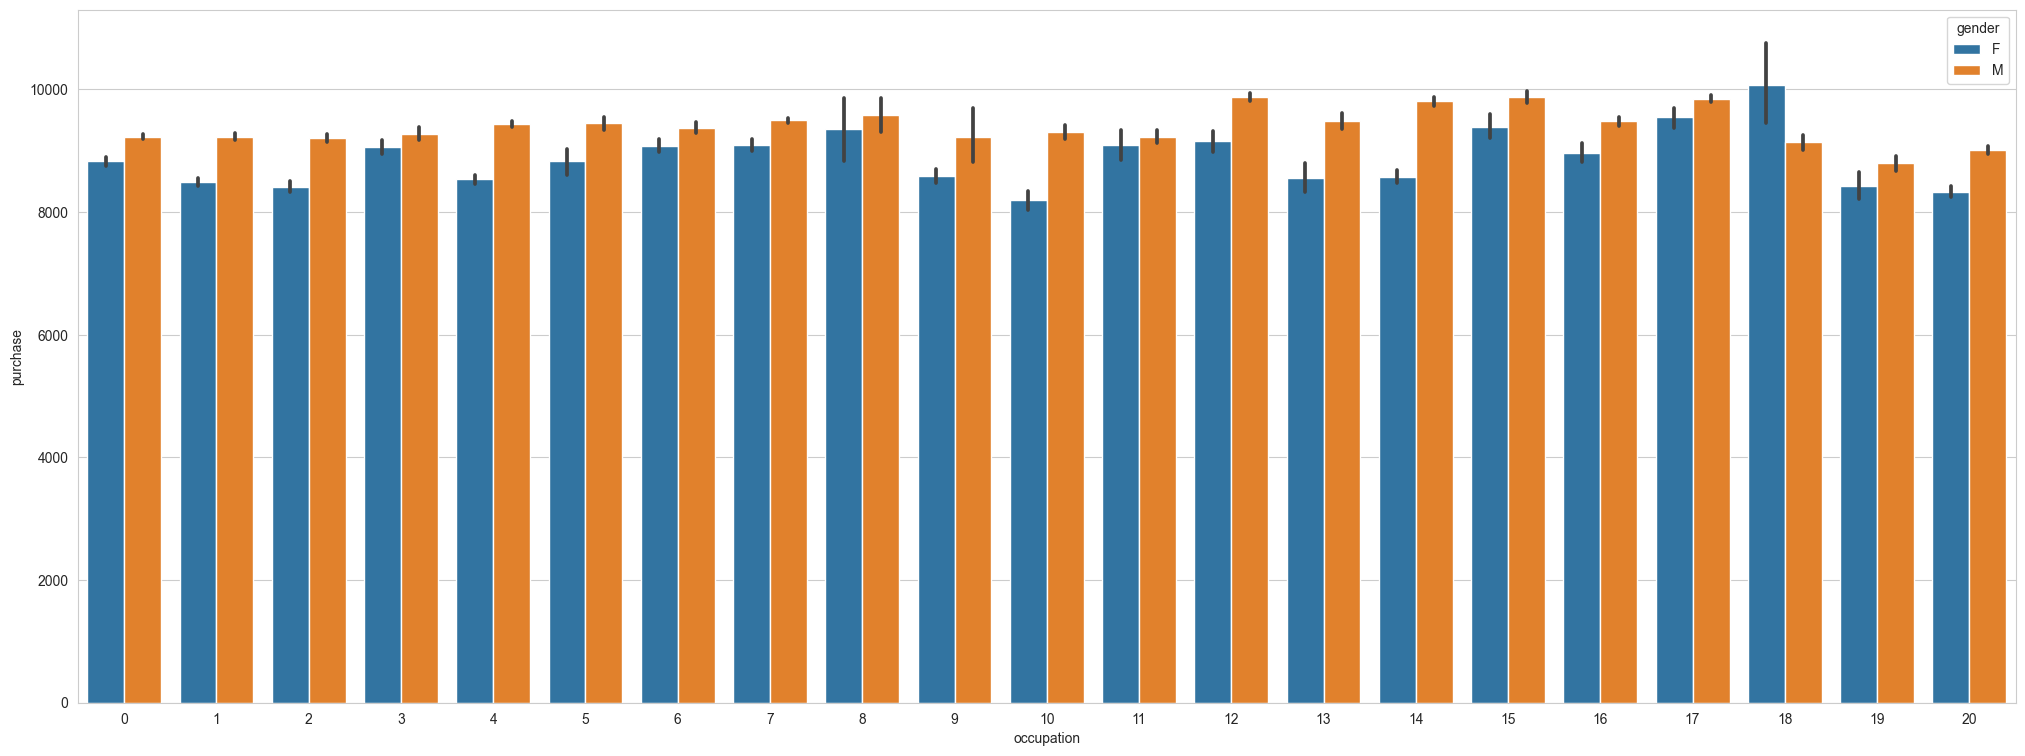

In [90]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.barplot(data=df,y='purchase',x='occupation',hue='gender')

In [91]:
#Product Category 1 VS Purchase
compare = df.groupby('category_1').agg({'purchase': 'mean'}).reset_index()

<AxesSubplot: title={'center': 'product1 vs purchase'}, xlabel='category_1', ylabel='purchase'>

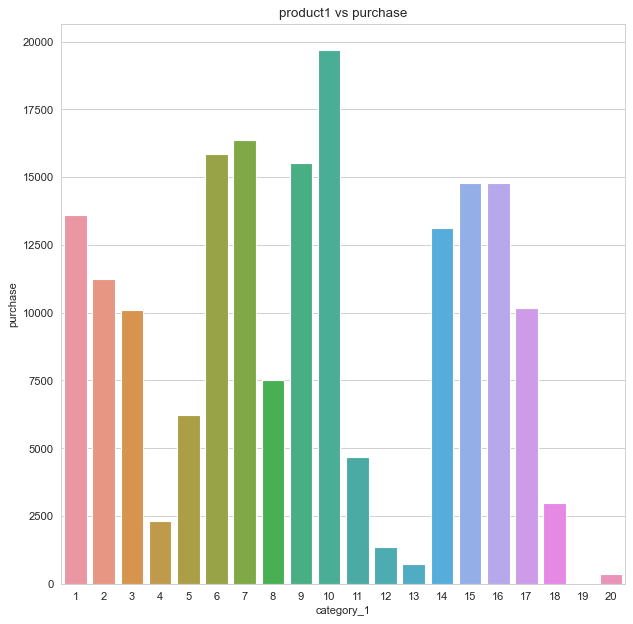

In [92]:
plt.figure(figsize=(20,20),dpi=80)
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(x='category_1',y='purchase',data=compare)

In [93]:
#Product 2 VS Purchase
product = df.groupby('category_2').agg({'purchase': 'mean'}).reset_index()

<AxesSubplot: title={'center': 'product2 vs purchase'}, xlabel='category_2', ylabel='purchase'>

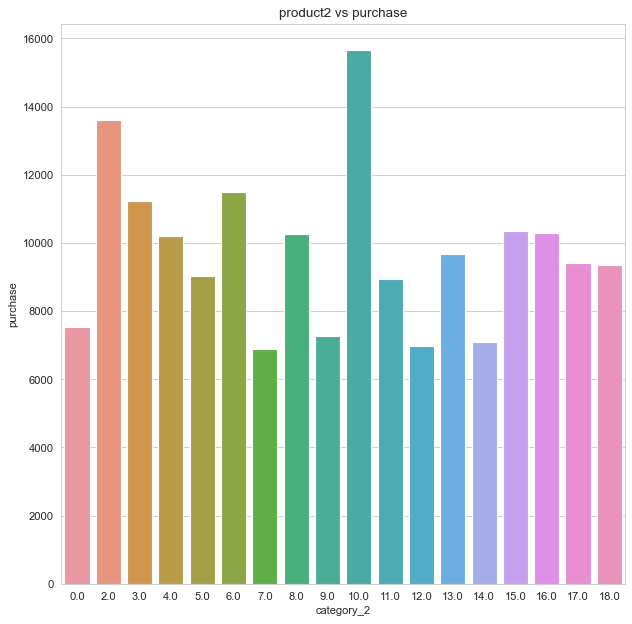

In [94]:
plt.figure(figsize=(20,20),dpi=80)
plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='category_2',y='purchase',data=product)

#### From the above visualization we observe that for category_3 the purchase rate for category 3 is more as compared to other categories

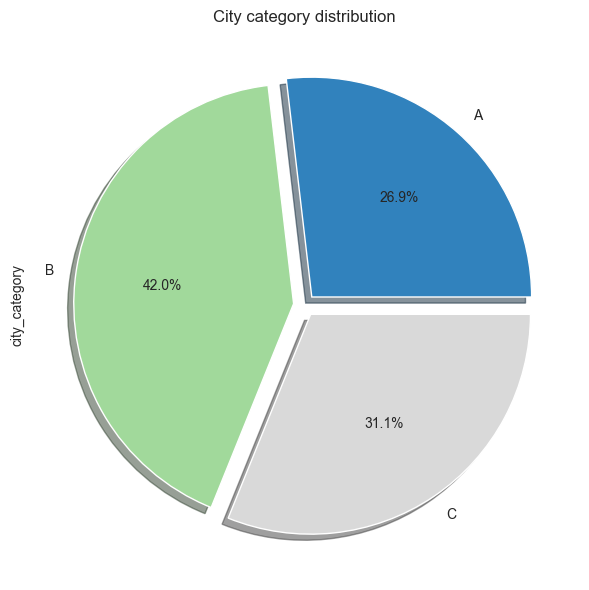

In [95]:
city = df.groupby('city_category')['city_category'].agg('count')
city.plot(subplots=True,kind='pie',figsize=(6,6),cmap='tab20c', shadow=True, autopct='%.1f%%',explode = (0.05,0.05,0.05),)
plt.title('City category distribution')
plt.tight_layout()

#### From the above visualization we observe that city B has the highest distribution as compared to city A and city C

In [97]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]